<a href="https://colab.research.google.com/github/Auful01/PCVK/blob/main/Week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import cv2 as cv
from google.colab import drive 
drive.mount('/content/drive')
import numpy as np
from google.colab.patches import cv2_imshow

def display(img, cmap='gray'):
  fig = plt.figure(figsize=(12,10))
  ax = fig.add_subplot(111)
  ax.imshow(img, cmap='gray')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


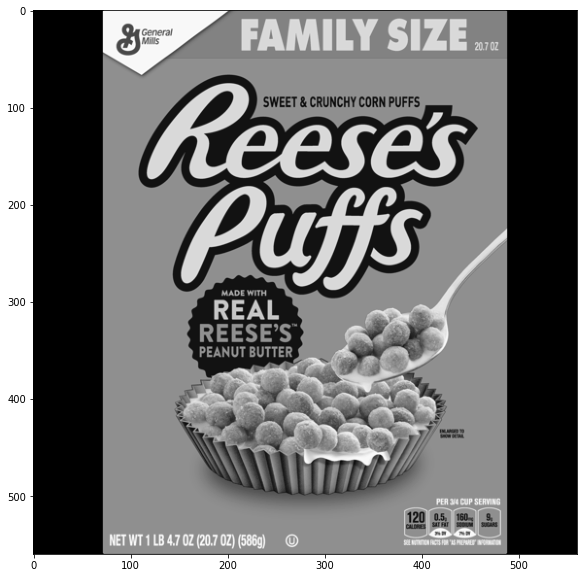

In [3]:
reeses = cv.imread('/content/drive/MyDrive/PCVK/FaceDet/reeses_puffs.png', 0)
display(reeses)

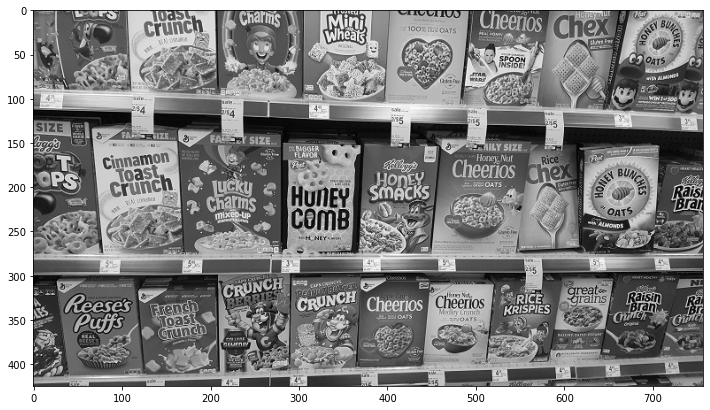

In [4]:
cereals = cv.imread('/content/drive/MyDrive/PCVK/FaceDet/many_cereals.jpg', 0)
display(cereals)

In [5]:
orb = cv.ORB_create()
kp1, des1 = orb.detectAndCompute(reeses, None)
kp2, des2 = orb.detectAndCompute(cereals, None)
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck = True)
matches = bf.match(des1, des2)
single_match = matches[0]
single_match.distance

71.0

In [6]:
len(matches)

139

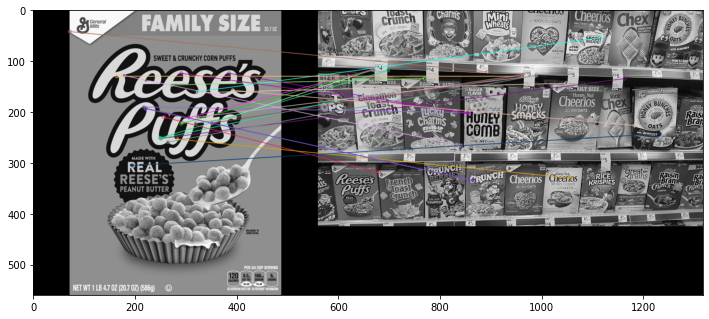

In [7]:
from sys import flags
matches = sorted(matches, key=lambda x:x.distance)
reeses_match = cv.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None,flags=2)
display(reeses_match)

In [8]:
!pip install opencv-contrib-python==4.4.0.44

In [9]:
sift = cv.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)

good = []

for match1, match2 in matches:
  if match1.distance < 0.75*match2.distance:
    good.append([match1])

len(good)

79

In [10]:
len(matches)

1501

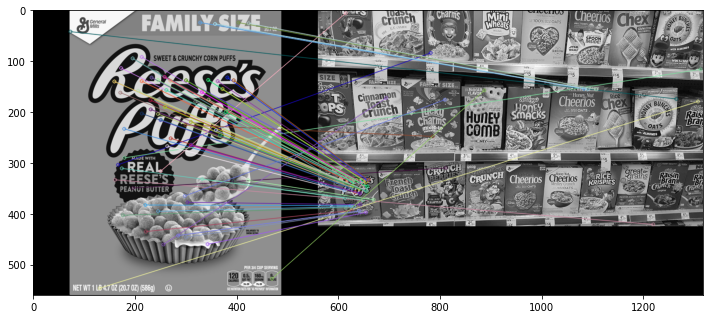

In [11]:
sift_matches = cv.drawMatchesKnn(reeses,kp1, cereals, kp2,good, None, flags=2)
display(sift_matches)

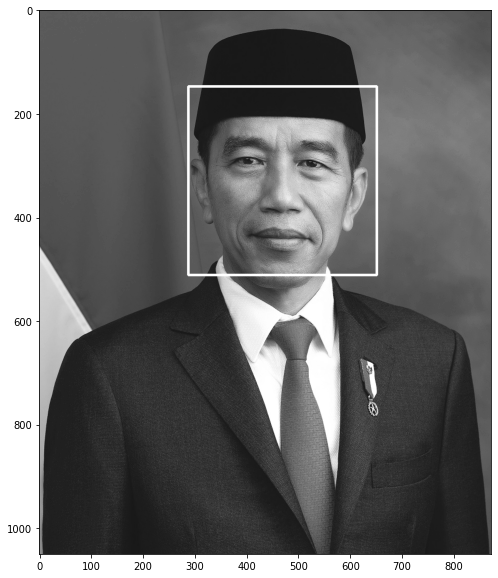

In [12]:
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/FaceDet/haarcascade_frontalface_alt2.xml')

jokowi = cv.imread('/content/drive/MyDrive/PCVK/FaceDet/jokowi.jpg', 0)
roi_wajah =  cascade_wajah.detectMultiScale(jokowi)
for(x,y,w,h) in roi_wajah:
  cv.rectangle(jokowi, (x,y), (x+w, y+h), (255,255,255), 3)
plt.figure(figsize = (10,10))
plt.imshow(jokowi, cmap='gray')


In [33]:
def detect(images):
  cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/FaceDet/haarcascade_frontalface_alt2.xml')
  roi_wajah =  cascade_wajah.detectMultiScale(images)
  for(x,y,w,h) in roi_wajah:
    cv.rectangle(images, (x,y), (x+w, y+h), (255,255,255), 3)
  return images

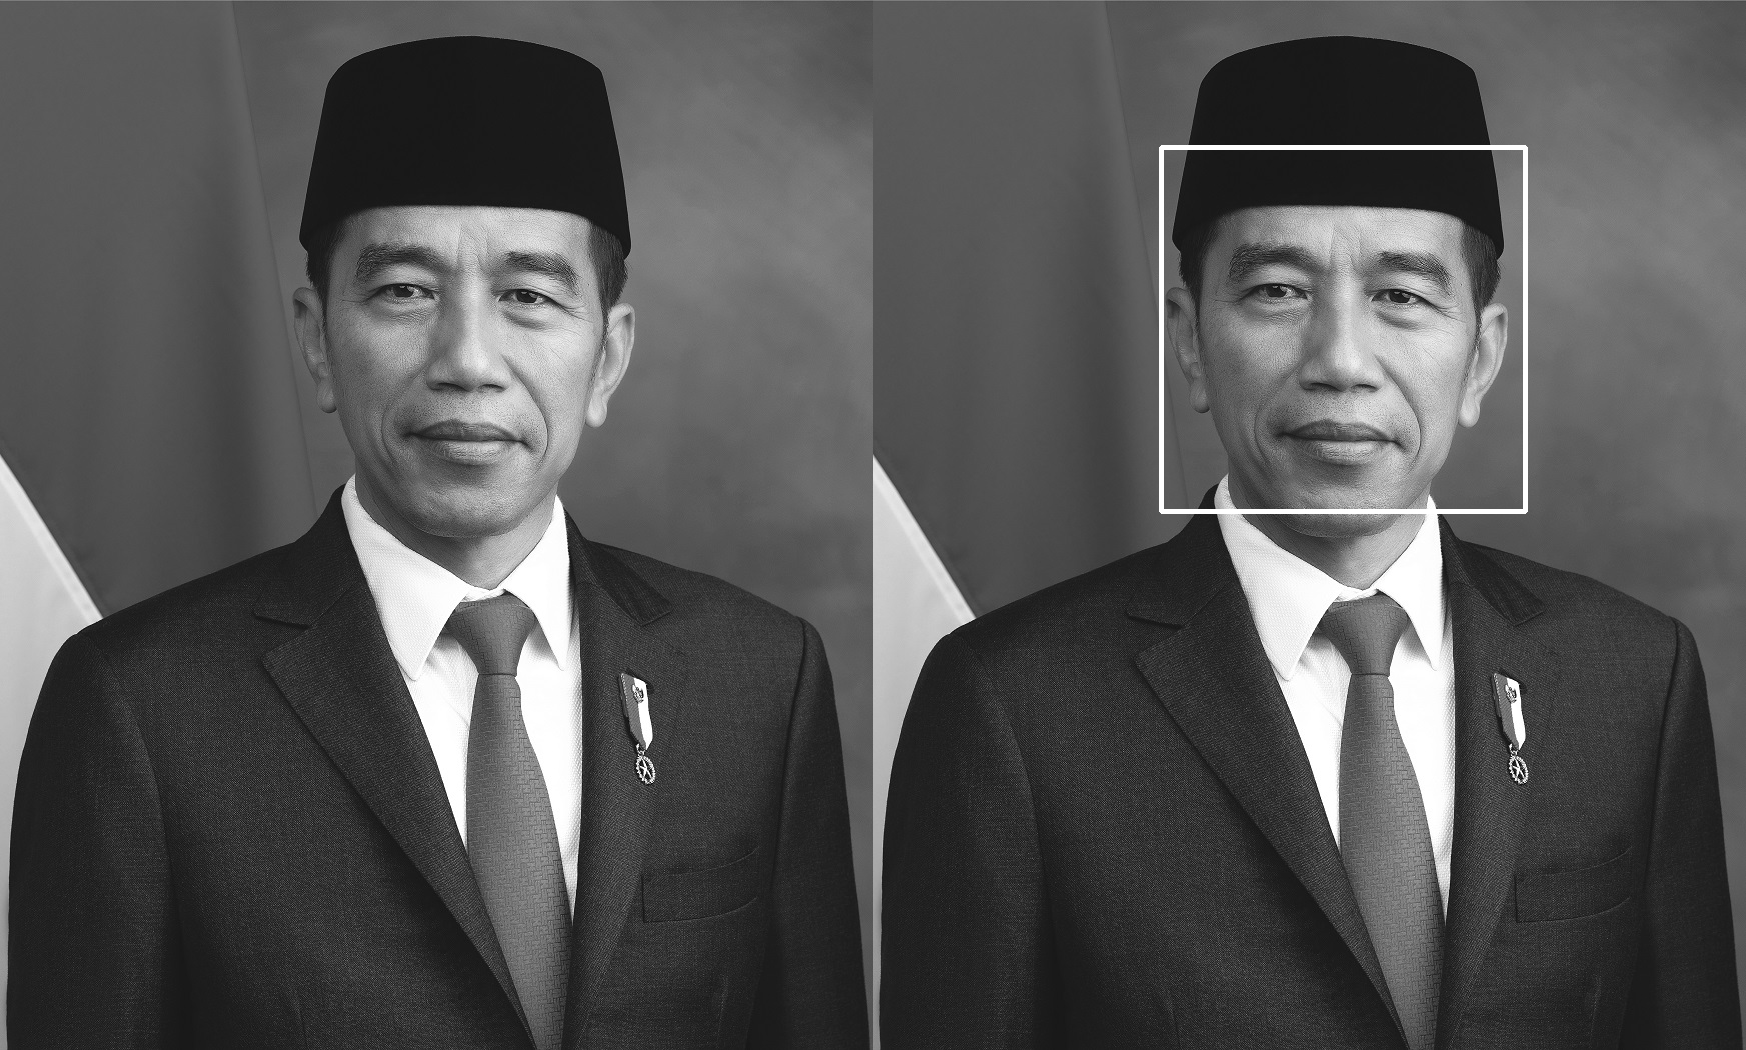

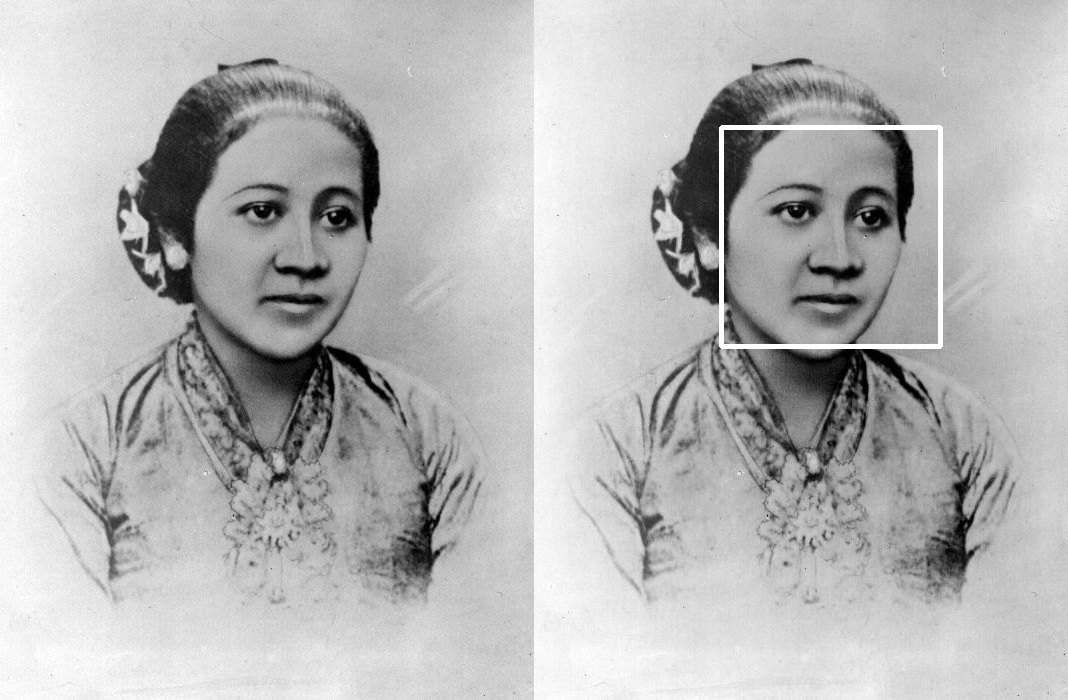

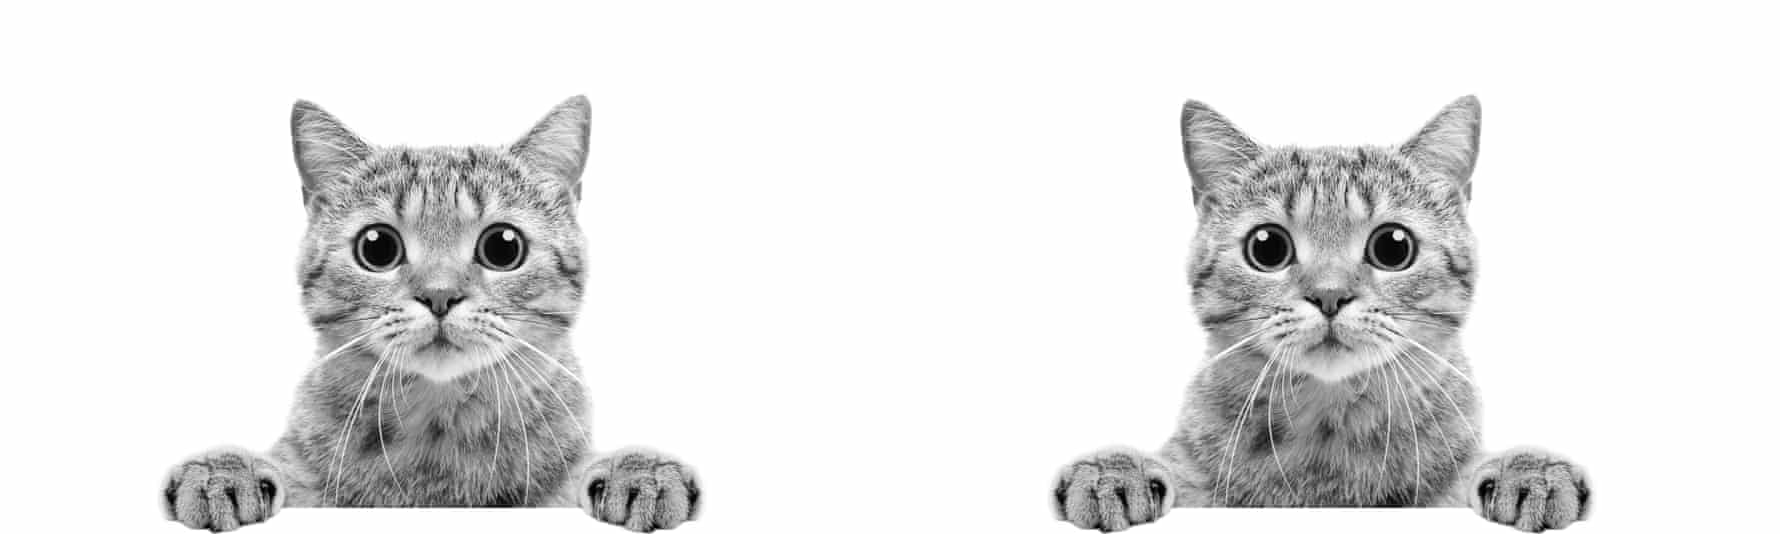

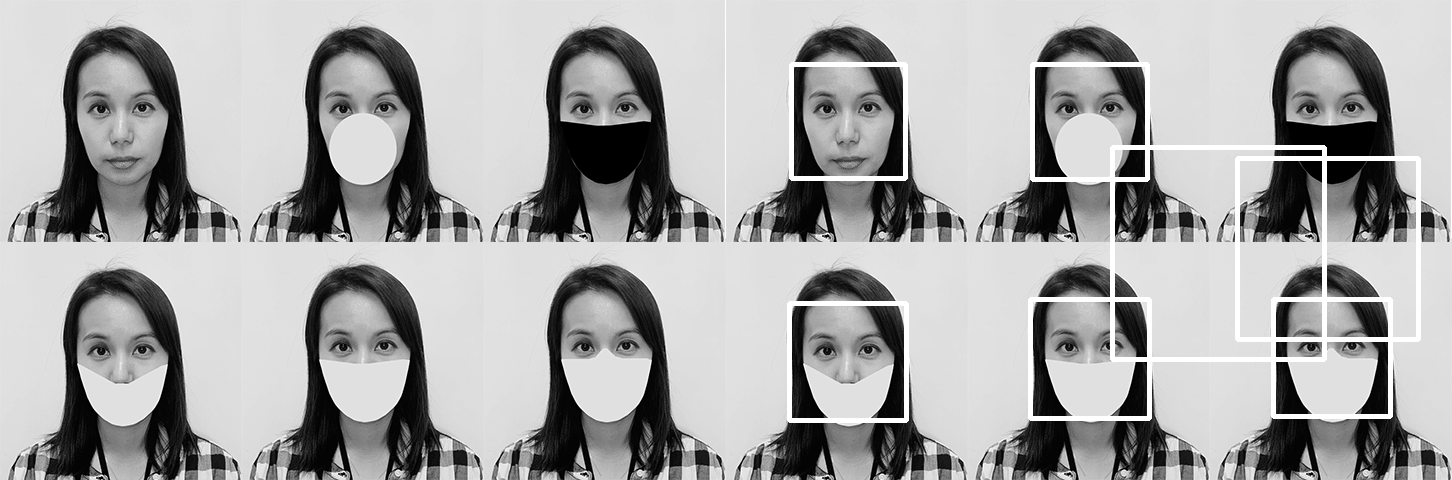

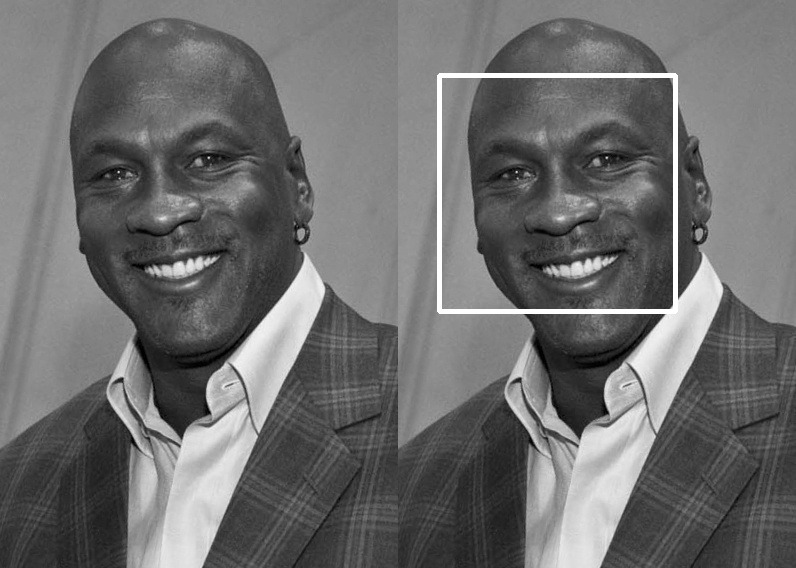

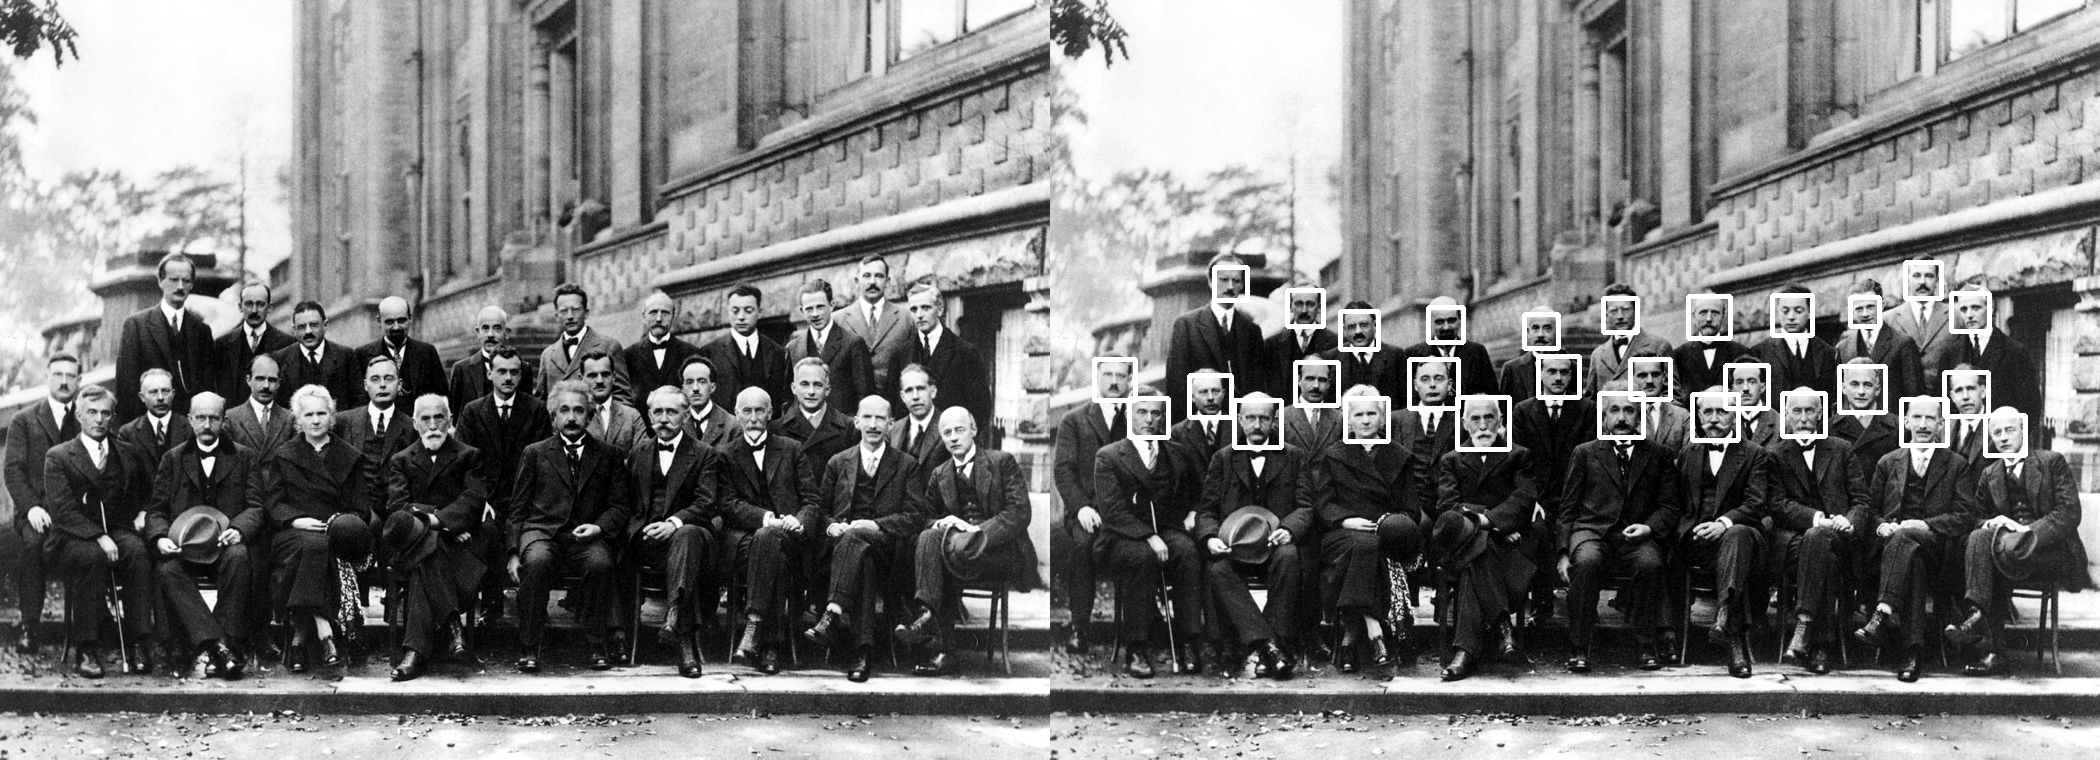

In [35]:
urls = ['/content/drive/MyDrive/PCVK/FaceDet/jokowi.jpg', '/content/drive/MyDrive/PCVK/FaceDet/kartini.jpg', '/content/drive/MyDrive/PCVK/FaceDet/kucing.jpg','/content/drive/MyDrive/PCVK/FaceDet/mask.png','/content/drive/MyDrive/PCVK/FaceDet/mjordan.jpg', '/content/drive/MyDrive/PCVK/FaceDet/solvayconf.jpg' ]

for url in urls:
  image = cv.imread(url,0)
  ori = cv.imread(url,0)
  Hori = np.concatenate((ori, detect(image)), axis=1)
  cv2_imshow( Hori )
  print('\n')



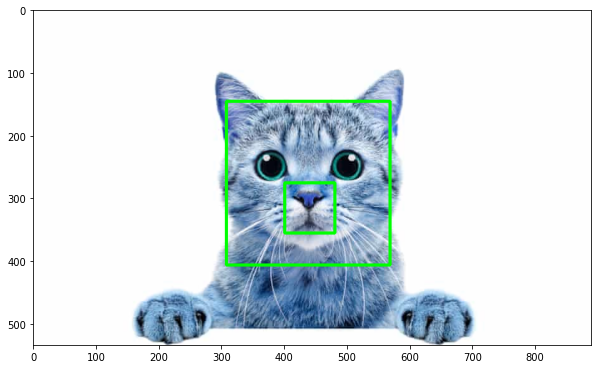

In [87]:
kocheng = cv.imread('/content/drive/MyDrive/PCVK/FaceDet/kucing.jpg')
cascade_facecat = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/FaceDet/haarcascade_frontalcatface_alt.xml')
roi_wajah =  cascade_facecat.detectMultiScale(kocheng)
for(x,y,w,h) in roi_wajah:
  cv.rectangle(kocheng, (x,y), (x+w, y+h), (0,255,0), 3)
plt.figure(figsize = (10,10))
plt.imshow(kocheng, cmap='gray')


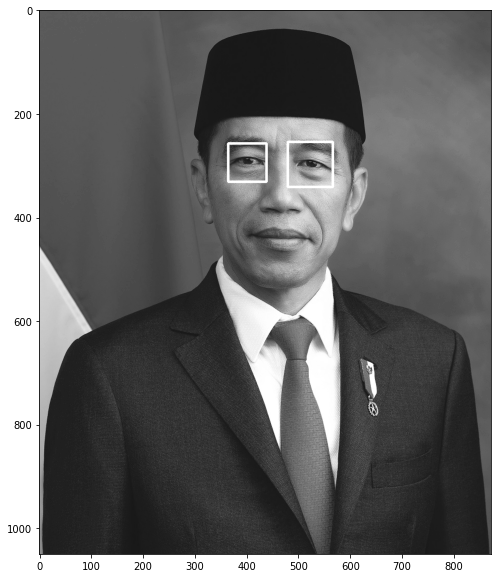

In [88]:
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/FaceDet/haarcascade_eyes.xml')

jokowi = cv.imread('/content/drive/MyDrive/PCVK/FaceDet/jokowi.jpg', 0)
roi_wajah =  cascade_wajah.detectMultiScale(jokowi)
for(x,y,w,h) in roi_wajah:
  cv.rectangle(jokowi, (x,y), (x+w, y+h), (255,255,255), 3)
plt.figure(figsize = (10,10))
plt.imshow(jokowi, cmap='gray')

In [36]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [37]:
# start streaming video from webcam
face_cascade = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/FaceDet/haarcascade_frontalface_alt2.xml')

video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0 
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # grayscale image for face detection
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # get face region coordinates
    faces = face_cascade.detectMultiScale(gray)
    # get face bounding box for overlay
    for (x,y,w,h) in faces:
      bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(0,255,0),2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

<IPython.core.display.Javascript object>

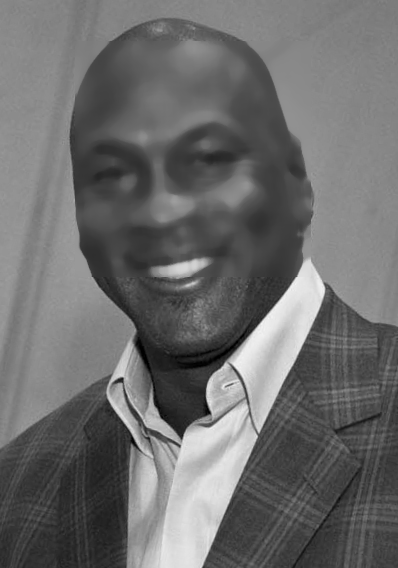

In [77]:
mark = cv.imread('/content/drive/MyDrive/PCVK/FaceDet/mjordan.jpg',0)
roi_wajah =  cascade_wajah.detectMultiScale(mark)
for(x,y,w,h) in roi_wajah:
    blur = cv.medianBlur(mark[x:x+w,y:y+h],13)
    mark[x:x+w,y:y+h] = blur
    cv2_imshow(mark)